In [1]:
import numpy as np
import pandas as pd
import torch
import pickle
import matplotlib.pyplot as plt
from lpne.models import DcsfaNmf

MODEL_FILE = "/hpc/home/mk423/Anxiety/FullDataWork/Models/Final_mt_Model_500_epochs.pt"
DATA_PATH = "/work/mk423/Anxiety/"
PROJECT_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Projections/"
FIGURE_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Figures/"
#data_file = DATA_PATH + "EPM_test_dict_May_17.pkl"

proj_file = PROJECT_PATH + "c19_epm_apr_2024_projection.csv"
mean_file = PROJECT_PATH + "c19_epm_apr_2024_mean_scores.csv"


model = torch.load(MODEL_FILE,map_location="cpu")
model.device="cpu"


old_feature_list = ["X_power_1_2","X_coh_1_2","X_gc_1_2"]
feature_weights = [10,1,1]



import os, sys
umc_data_tools_path = "/hpc/home/mk423/Anxiety/Universal-Mouse-Code/"
sys.path.append(umc_data_tools_path)
import umc_data_tools as umc_dt

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/hpc/home/mk423/.local/lib/python3.7/site-packages/lpne/pipelines/__init__.py:14: UserWarning: Could not load lpne/pipelines/default_params.yaml!
  warnings.warn("Could not load lpne/pipelines/default_params.yaml!")


In [2]:
df_full = pd.read_csv(proj_file)
df_in_task = df_full[df_full['in-task']==1].copy()
df_in_hc = df_full[df_full['in-task']==0].copy()
df_mean_scores = pd.read_csv(mean_file)

In [3]:
ca_mask = np.logical_or(df_in_task.roi==1,
                df_in_task.roi==3
              )

df_ca = df_in_task[ca_mask==1]
df_ca.to_csv(PROJECT_PATH + "Apr2024_clock_in_closed_arms.csv",index=False)

In [16]:
df_ca

,Unnamed: 0,agg score,net 1 scores,net 2 scores,net 3 scores,mouse,roi,condition,in-task,time,expDate,hc_v_task auc,net 1 hc_v_task auc,net 2 hc_v_task auc,net 3 hc_v_task auc
302,302,5.035600,0.167142,0.202325,0.034586,Mouse67151,3.0,CLOCK,1.0,323,41624,0.670959,0.639220,0.670891,0.555512
303,303,4.525511,0.151227,0.181286,0.029864,Mouse67151,3.0,CLOCK,1.0,324,41624,0.670959,0.639220,0.670891,0.555512
304,304,5.846836,0.169776,0.247440,0.080456,Mouse67151,3.0,CLOCK,1.0,325,41624,0.670959,0.639220,0.670891,0.555512
305,305,5.089672,0.177106,0.200512,0.016188,Mouse67151,3.0,CLOCK,1.0,326,41624,0.670959,0.639220,0.670891,0.555512
306,306,5.670633,0.177522,0.234649,0.026841,Mouse67151,3.0,CLOCK,1.0,327,41624,0.670959,0.639220,0.670891,0.555512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,1988,3.365202,0.139829,0.119462,0.005210,Mouse67152,3.0,CLOCK,1.0,1123,41624,0.618144,0.629211,0.598339,0.579993
1989,1989,2.171977,0.100492,0.070930,0.006955,Mouse67152,3.0,CLOCK,1.0,1124,41624,0.618144,0.629211,0.598339,0.579993
1990,1990,2.553425,0.092377,0.097544,0.030698,Mouse67152,3.0,CLOCK,1.0,1125,41624,0.618144,0.629211,0.598339,0.579993
1991,1991,3.631226,0.139553,0.133939,0.042996,Mouse67152,3.0,CLOCK,1.0,1126,41624,0.618144,0.629211,0.598339,0.579993


In [5]:
geno_map = {}

for mouse in np.unique(df_in_task.mouse):
    geno = df_in_task[df_in_task.mouse==mouse].condition.values[0]
    geno_map[mouse] = geno

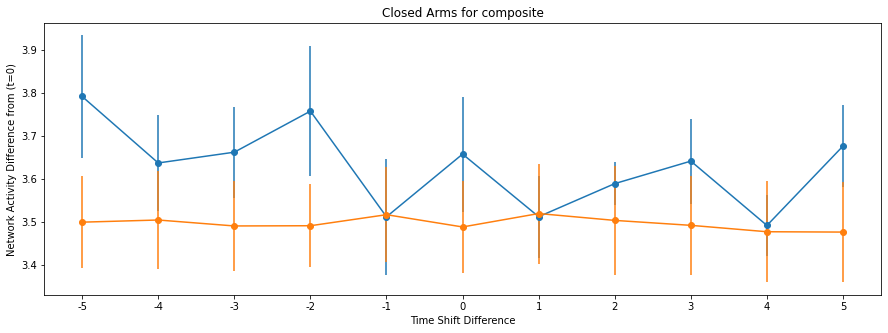

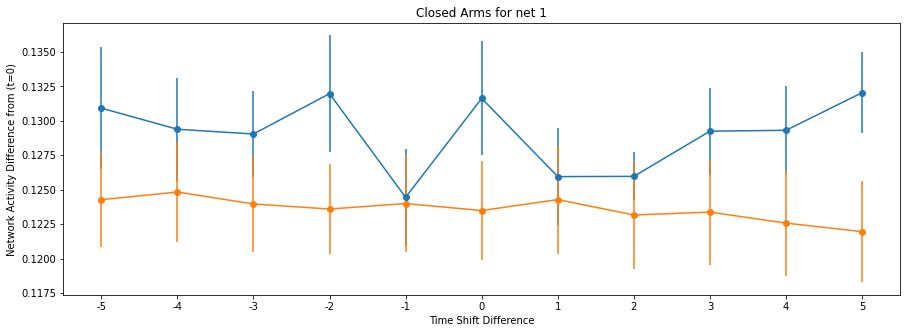

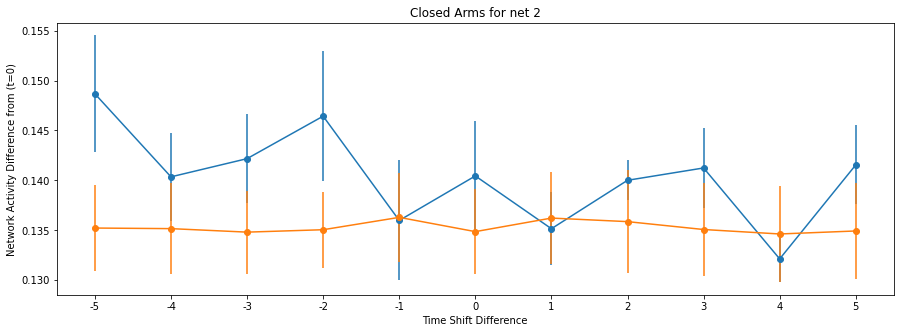

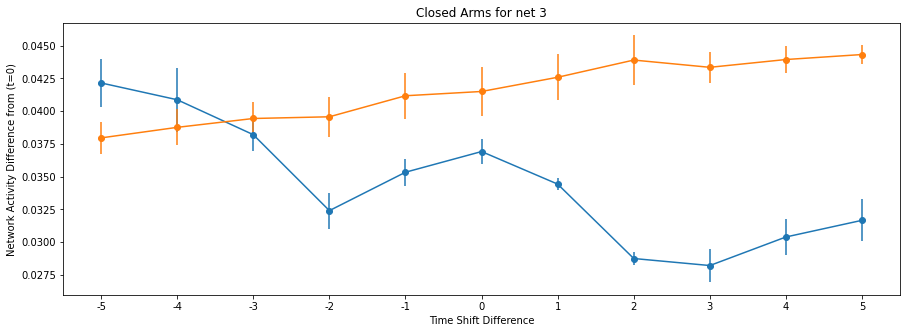

,mouse,geno,location,network,mean task score,mean hc score,-5,-4,-3,-2,-1,0,1,2,3,4,5
0,Mouse67151,CLOCK,oa,composite,3.884072,3.273725,4.263067,4.00941,4.014255,4.256673,3.960785,4.100549,3.828476,3.756643,3.969702,3.729205,3.995315
1,Mouse67152,CLOCK,oa,composite,3.141111,2.772209,3.320469,3.264811,3.310044,3.25856,3.062933,3.214896,3.195794,3.421485,3.313134,3.25438,3.357667
2,Mouse67151,CLOCK,ca,composite,3.884072,3.273725,3.854094,3.880024,3.836107,3.810269,3.881867,3.84478,3.905424,3.920974,3.87467,3.868287,3.862808
3,Mouse67152,CLOCK,ca,composite,3.141111,2.772209,3.144726,3.128846,3.145113,3.171964,3.151739,3.131745,3.133479,3.086068,3.109382,3.086027,3.089915
0,Mouse67151,CLOCK,oa,net 1,0.13616,0.121816,0.145577,0.141784,0.139373,0.146027,0.136086,0.145338,0.137563,0.131749,0.139698,0.139911,0.141866
1,Mouse67152,CLOCK,oa,net 1,0.11184,0.100045,0.116278,0.117002,0.11872,0.117927,0.112808,0.117932,0.114339,0.120191,0.118806,0.118721,0.122238
2,Mouse67151,CLOCK,ca,net 1,0.13616,0.121816,0.135776,0.136983,0.13549,0.134345,0.135739,0.135376,0.137287,0.136246,0.136012,0.135264,0.134188
3,Mouse67152,CLOCK,ca,net 1,0.11184,0.100045,0.112775,0.112676,0.112439,0.112847,0.11225,0.111596,0.111274,0.11008,0.110735,0.10988,0.109715
0,Mouse67151,CLOCK,oa,net 2,0.151068,0.123114,0.168072,0.155051,0.157046,0.167909,0.155924,0.158817,0.147241,0.146587,0.15461,0.139956,0.154677
1,Mouse67152,CLOCK,oa,net 2,0.121187,0.106307,0.12927,0.125655,0.127301,0.124949,0.116049,0.122069,0.123076,0.133429,0.127876,0.124318,0.128426


In [11]:
num_mice=2
sliding_avg_size=5

allMice_oa_means = []
allMice_ca_means = []

allDiffs_oa = []
allDiffs_ca = []
for mouse in np.unique(df_in_task.mouse):
    
    #print(mouse)
    mouse_mask = df_in_task.mouse==mouse
    nan_filter = 1-np.isnan(df_in_task.roi)
    mask = np.logical_and(mouse_mask,nan_filter)
    
    in_open_arms = np.logical_or(df_in_task[mask==1]["roi"].values==2,
                                 df_in_task[mask==1]["roi"].values==4)
    
    in_closed_arms = np.logical_or(df_in_task[mask==1]["roi"].values==1,
                                   df_in_task[mask==1]["roi"].values==3)
    
    mouse_time = df_in_task[mask==1]["time"].values
    mouse_roi = df_in_task[mask==1]["roi"].values
    
    nagg_s = df_in_task[mask==1]["agg score"].values
    n1_s = df_in_task[mask==1]["net 1 scores"].values
    n2_s = df_in_task[mask==1]["net 2 scores"].values
    n3_s = df_in_task[mask==1]["net 3 scores"].values
    
    mouse_oa_avgs = []
    mouse_ca_avgs = []
    mouse_avgs = []
    
    oa_centers = []
    ca_centers = []
    all_times = []
    for idx, roi in enumerate(mouse_roi):
        if idx > sliding_avg_size and idx < (len(mouse_roi) - sliding_avg_size):
            
            nagg_slice = np.zeros(sliding_avg_size*2 + 1)*np.nan
            n1_slice = np.zeros(sliding_avg_size*2 + 1)*np.nan
            n2_slice = np.zeros(sliding_avg_size*2 + 1)*np.nan
            n3_slice = np.zeros(sliding_avg_size*2 + 1)*np.nan
            
            center_time = mouse_time[idx]
            start_time = center_time - sliding_avg_size
            end_time = center_time + sliding_avg_size
            cont_time = np.arange(start_time,end_time+1)
            
            actual_time = mouse_time[idx-sliding_avg_size:idx+sliding_avg_size+1]
            
            actual_nagg_scores = nagg_s[idx-sliding_avg_size:idx+sliding_avg_size+1]
            actual_n1_scores = n1_s[idx-sliding_avg_size:idx+sliding_avg_size+1]
            actual_n2_scores = n2_s[idx-sliding_avg_size:idx+sliding_avg_size+1]
            actual_n3_scores = n3_s[idx-sliding_avg_size:idx+sliding_avg_size+1]

            for i,time in enumerate(cont_time):
                if time in actual_time:
                    temp_mask = actual_time==time
                    nagg_slice[i] = actual_nagg_scores[temp_mask==1][0]
                    n1_slice[i] = actual_n1_scores[temp_mask==1][0]
                    n2_slice[i] = actual_n2_scores[temp_mask==1][0]
                    n3_slice[i] = actual_n3_scores[temp_mask==1][0]
                    
            slice_means = [nagg_slice,
                           n1_slice,
                           n2_slice,
                           n3_slice]
            
            all_times.append(center_time)
            mouse_avgs.append(np.array(slice_means))
            #if in the open arms
            if roi==2 or roi==4: 
                mouse_oa_avgs.append(slice_means)
                oa_centers.append(center_time)
            #if in the closed arms
            elif roi==1 or roi==3: 
                mouse_ca_avgs.append(slice_means)
                ca_centers.append(center_time)
            
    if len(mouse_oa_avgs) >0:
        mouse_oa_slice_mean = np.nanmean(mouse_oa_avgs,axis=0)
    else:
        mouse_oa_slice_mean = np.zeros((4,11))*np.nan
    mouse_ca_slice_mean = np.nanmean(mouse_ca_avgs,axis=0)
    
    #print(len(mouse_oa_avgs))
    allMice_oa_means.append(mouse_oa_slice_mean)
    allMice_ca_means.append(mouse_ca_slice_mean)
    
    
allMice_oa_means = np.array(allMice_oa_means)
allMice_ca_means = np.array(allMice_ca_means)

df_list = []
for i, net in zip(range(4),["composite","net 1","net 2","net 3"]):
    
    plt.figure(figsize=(15,5))
    #shared_meanish = np.nanmean(allMice_oa_means,axis=0)[i][5] / 2 + np.nanmean(allMice_ca_means,axis=0)[i][5] / 2
    #plt.subplot(1,2,1)
    oa_mean = np.nanmean(allMice_oa_means,axis=0)
    oa_stderr = np.nanstd(allMice_oa_means,axis=0) / np.sqrt(11)

    plt.errorbar(np.arange(11),oa_mean[i,:],yerr=oa_stderr[i,:],fmt="-o", label="Open Arms")
    plt.xticks(np.arange(11), np.arange(11)-5)
    plt.title("Open Arms for {}".format(net))
    plt.ylabel("Network Activity Difference from (t=0)")
    plt.xlabel("Time Shift Difference")
    #plt.subplot(1,2,2)
    ca_mean = np.nanmean(allMice_ca_means,axis=0)
    ca_stderr = np.nanstd(allMice_ca_means,axis=0) / np.sqrt(11)

    plt.errorbar(np.arange(11),ca_mean[i,:],yerr=ca_stderr[i,:],fmt="-o", label="Closed Arms")
    plt.xticks(np.arange(11), np.arange(11)-5)
    plt.title("Closed Arms for {}".format(net))
    plt.ylabel("Network Activity Difference from (t=0)")
    plt.xlabel("Time Shift Difference")
    plt.show()
    
    ctr_surr_mat = np.vstack([allMice_oa_means[:,i,:],
                              allMice_ca_means[:,i,:]])
    mice = np.vstack([np.unique(df_in_task.mouse).reshape(-1,1),
                      np.unique(df_in_task.mouse).reshape(-1,1)])
    
    geno = np.vstack([np.array([geno_map[mouse] for mouse in np.unique(df_in_task.mouse)]).reshape(-1,1),
                      np.array([geno_map[mouse] for mouse in np.unique(df_in_task.mouse)]).reshape(-1,1)])
    
    mean_net_intask_scores = np.vstack([np.array([df_mean_scores[df_mean_scores.mouse==mouse]["{} avgTaskScore".format(net)] for mouse in np.unique(df_in_task.mouse)]).reshape(-1,1),
                                       np.array([df_mean_scores[df_mean_scores.mouse==mouse]["{} avgTaskScore".format(net)] for mouse in np.unique(df_in_task.mouse)]).reshape(-1,1)])
    
    mean_net_hc_scores = np.vstack([np.array([df_mean_scores[df_mean_scores.mouse==mouse]["{} avgHCScore".format(net)] for mouse in np.unique(df_in_task.mouse)]).reshape(-1,1),
                                       np.array([df_mean_scores[df_mean_scores.mouse==mouse]["{} avgHCScore".format(net)] for mouse in np.unique(df_in_task.mouse)]).reshape(-1,1)])
    #mean_net_surr_scores = np.vstack([mean_oa_scores[i,:].reshape(-1,1),
    #                                  mean_ca_scores[i,:].reshape(-1,1)])
    
    ctr_vs_surr = np.hstack([["oa" for _ in range(num_mice)],
                             ["ca" for _ in range(num_mice)]]).reshape(-1,1)
    
    net_number = np.hstack([[net for _ in range(num_mice)],
                             [net for _ in range(num_mice)]]).reshape(-1,1)
    
    saveData = np.hstack([mice,geno,ctr_vs_surr,net_number,mean_net_intask_scores,mean_net_hc_scores,ctr_surr_mat]).astype(object)
    
    df_saveData = pd.DataFrame(saveData,
                               columns = ["mouse","geno","location","network","mean task score","mean hc score"] + list(np.arange(-5,6).astype(str)))
    
    df_list.append(df_saveData)
    
df_complete = pd.concat(df_list)
df_complete.to_csv(PROJECT_PATH + "Apr_2024_New_CLOCKs_0s_filterd_CLOCK_BalbC_EPM_11s_slice_data.csv")
df_complete

Mouse67151
Mouse67152


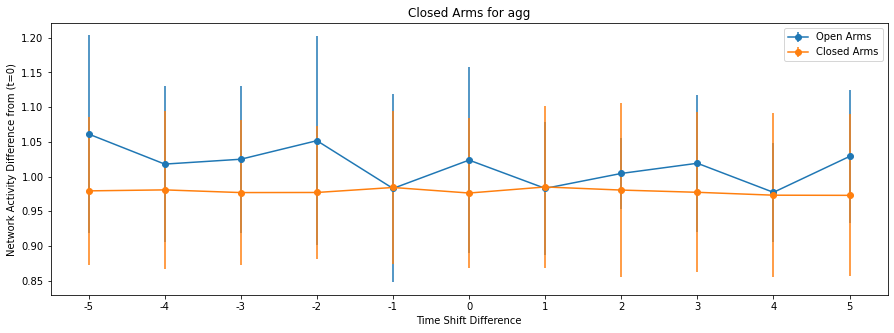

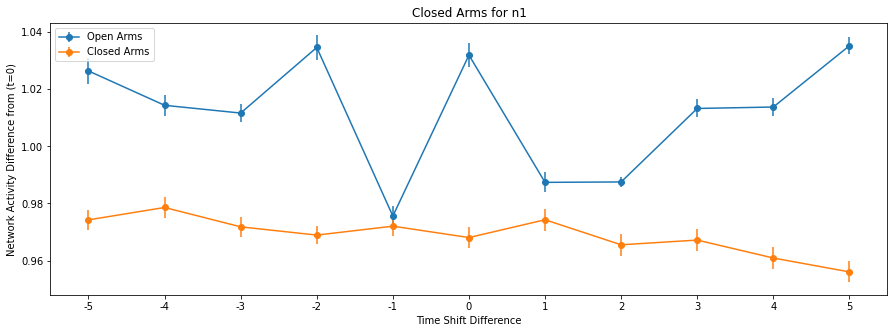

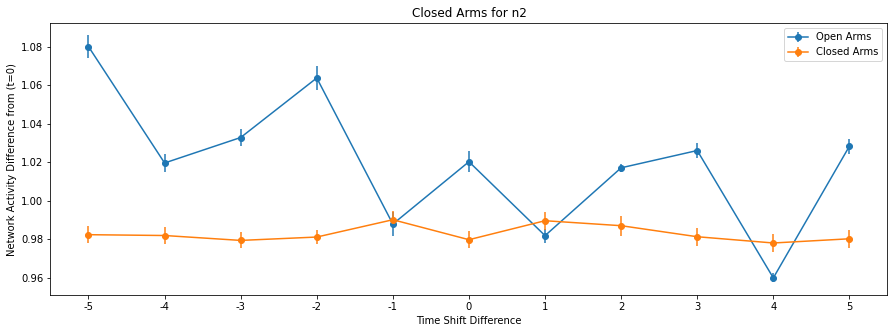

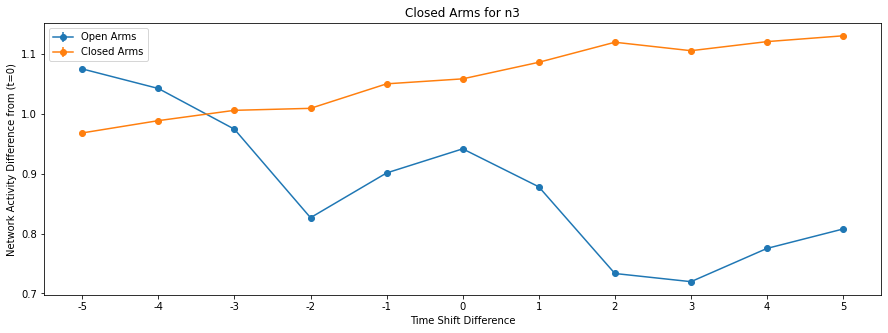

In [3]:
sliding_avg_size=5

allMice_oa_means = []
allMice_ca_means = []

oa_mice_list = []
ca_mice_list = []

oa_geno_list = []
ca_geno_list = []

allDiffs_oa = []
allDiffs_ca = []
for mouse in np.unique(df_in_task.mouse):
    
    print(mouse)
    mouse_mask = df_in_task.mouse==mouse
    nan_filter = df_in_task.roi > 0
    mask = np.logical_and(mouse_mask,nan_filter)
    
    in_open_arms = np.logical_or(df_in_task[mask==1]["roi"].values==2,
                                 df_in_task[mask==1]["roi"].values==4)
    
    in_closed_arms = np.logical_or(df_in_task[mask==1]["roi"].values==1,
                                   df_in_task[mask==1]["roi"].values==3)
    
    mouse_time = df_in_task[mask==1]["time"].values
    mouse_roi = df_in_task[mask==1]["roi"].values
    
    nagg_s = df_in_task[mask==1]["agg score"].values
    n1_s = df_in_task[mask==1]["net 1 scores"].values
    n2_s = df_in_task[mask==1]["net 2 scores"].values
    n3_s = df_in_task[mask==1]["net 3 scores"].values
    geno = df_in_task[mask==1]["condition"].values[0]
    
    mouse_oa_avgs = []
    mouse_ca_avgs = []
    mouse_avgs = []
    
    oa_centers = []
    ca_centers = []
    all_times = []
    for idx, roi in enumerate(mouse_roi):
        if idx > sliding_avg_size and idx < (len(mouse_roi) - sliding_avg_size):
            
            nagg_slice = np.zeros(sliding_avg_size*2 + 1)*np.nan
            n1_slice = np.zeros(sliding_avg_size*2 + 1)*np.nan
            n2_slice = np.zeros(sliding_avg_size*2 + 1)*np.nan
            n3_slice = np.zeros(sliding_avg_size*2 + 1)*np.nan
            
            center_time = mouse_time[idx]
            start_time = center_time - sliding_avg_size
            end_time = center_time + sliding_avg_size
            cont_time = np.arange(start_time,end_time+1)
            
            actual_time = mouse_time[idx-sliding_avg_size:idx+sliding_avg_size+1]
            
            actual_nagg_scores = nagg_s[idx-sliding_avg_size:idx+sliding_avg_size+1]
            actual_n1_scores = n1_s[idx-sliding_avg_size:idx+sliding_avg_size+1]
            actual_n2_scores = n2_s[idx-sliding_avg_size:idx+sliding_avg_size+1]
            actual_n3_scores = n3_s[idx-sliding_avg_size:idx+sliding_avg_size+1]

            for i,time in enumerate(cont_time):
                if time in actual_time:
                    temp_mask = actual_time==time
                    nagg_slice[i] = actual_nagg_scores[temp_mask==1][0]
                    n1_slice[i] = actual_n1_scores[temp_mask==1][0]
                    n2_slice[i] = actual_n2_scores[temp_mask==1][0]
                    n3_slice[i] = actual_n3_scores[temp_mask==1][0]
                    
            slice_means = [nagg_slice,
                           n1_slice,
                           n2_slice,
                           n3_slice]
            
            all_times.append(center_time)
            mouse_avgs.append(np.array(slice_means))
            #if in the open arms
            if roi==2 or roi==4: 
                mouse_oa_avgs.append(slice_means)
                oa_centers.append(center_time)
            #if in the closed arms
            elif roi==1 or roi==3: 
                mouse_ca_avgs.append(slice_means)
                ca_centers.append(center_time)
            
    if len(oa_centers) > 0 and mouse!="Mouse69861":
        mouse_oa_slice_mean = np.nanmean(mouse_oa_avgs,axis=0)
        allMice_oa_means.append(mouse_oa_slice_mean)
        oa_mice_list.append(mouse)
        oa_geno_list.append(geno)
    
    if len(ca_centers) > 0 and mouse!="Mouse69861":
        mouse_ca_slice_mean = np.nanmean(mouse_ca_avgs,axis=0)
        allMice_ca_means.append(mouse_ca_slice_mean)
        ca_mice_list.append(mouse)
        ca_geno_list.append(geno)
    
for i, net in zip(range(4),["agg","n1","n2","n3"]):

    plt.figure(figsize=(15,5))
    shared_meanish = np.mean(allMice_oa_means,axis=0)[i][5] / 2 + np.mean(allMice_ca_means,axis=0)[i][5] / 2
    #plt.subplot(1,2,1)
    oa_mean = np.mean(allMice_oa_means / shared_meanish,axis=0)
    oa_stderr = np.std(allMice_oa_means,axis=0) / np.sqrt(11)

    plt.errorbar(np.arange(11),oa_mean[i,:],yerr=oa_stderr[i,:],fmt="-o", label="Open Arms")
    plt.xticks(np.arange(11), np.arange(11)-5)
    plt.title("Open Arms for {}".format(net))
    plt.ylabel("Network Activity Difference from (t=0)")
    plt.xlabel("Time Shift Difference")
    #plt.subplot(1,2,2)
    ca_mean = np.mean(allMice_ca_means / shared_meanish ,axis=0)
    ca_stderr = np.std(allMice_ca_means,axis=0) / np.sqrt(11)

    plt.errorbar(np.arange(11),ca_mean[i,:],yerr=ca_stderr[i,:],fmt="-o", label="Closed Arms")
    plt.xticks(np.arange(11), np.arange(11)-5)
    plt.title("Closed Arms for {}".format(net))
    plt.ylabel("Network Activity Difference from (t=0)")
    plt.xlabel("Time Shift Difference")
    plt.legend()
    plt.show()

In [8]:
oa_mouse_segments = []
ca_mouse_segments = []

for i, net in zip(range(4),["agg","n1","n2","n3"]):
    chunk_oa = np.hstack([np.array(oa_mice_list).reshape(-1,1).astype(object),
                          np.array(oa_geno_list).reshape(-1,1).astype(object),
                         np.array([net for _ in range(len(oa_mice_list))]).reshape(-1,1).astype(object),
                         np.array(["OpenArms" for _ in range(len(oa_mice_list))]).reshape(-1,1).astype(object),
                         np.array(allMice_oa_means)[:,i,:]]).astype(object)
    
    chunk_ca = np.hstack([np.array(ca_mice_list).reshape(-1,1).astype(object),
                          np.array(ca_geno_list).reshape(-1,1).astype(object),
                         np.array([net for _ in range(len(ca_mice_list))]).reshape(-1,1).astype(object),
                         np.array(["ClosedArms" for _ in range(len(ca_mice_list))]).reshape(-1,1).astype(object),
                         np.array(allMice_ca_means)[:,i,:]]).astype(object)
    
    oa_mouse_segments.append(chunk_oa)
    ca_mouse_segments.append(chunk_ca)
    

saveData = np.vstack([
                    np.vstack(oa_mouse_segments),
                    np.vstack(ca_mouse_segments)
                    ])

df_save = pd.DataFrame(saveData,columns = ["mouse","geno","network","location"] + list(np.arange(-5,6).astype(str)))
df_save.to_csv(PROJECT_PATH + "CD19_Apr2024_EPM_OA_vs_CA_11_second_neighborhood_all_nets.csv",index=False)

In [7]:
df_save

,mouse,geno,network,location,-5,-4,-3,-2,-1,0,1,2,3,4,5
0,Mouse67151,CLOCK,agg,OpenArms,4.263067,4.00941,4.014255,4.256673,3.960785,4.100549,3.828476,3.756643,3.969702,3.729205,3.995315
1,Mouse67152,CLOCK,agg,OpenArms,3.320469,3.264811,3.310044,3.25856,3.062933,3.214896,3.195794,3.421485,3.313134,3.25438,3.357667
2,Mouse67151,CLOCK,n1,OpenArms,0.145577,0.141784,0.139373,0.146027,0.136086,0.145338,0.137563,0.131749,0.139698,0.139911,0.141866
3,Mouse67152,CLOCK,n1,OpenArms,0.116278,0.117002,0.11872,0.117927,0.112808,0.117932,0.114339,0.120191,0.118806,0.118721,0.122238
4,Mouse67151,CLOCK,n2,OpenArms,0.168072,0.155051,0.157046,0.167909,0.155924,0.158817,0.147241,0.146587,0.15461,0.139956,0.154677
5,Mouse67152,CLOCK,n2,OpenArms,0.12927,0.125655,0.127301,0.124949,0.116049,0.122069,0.123076,0.133429,0.127876,0.124318,0.128426
6,Mouse67151,CLOCK,n3,OpenArms,0.048129,0.048975,0.042317,0.036954,0.038779,0.040014,0.036011,0.030506,0.032492,0.0349,0.036986
7,Mouse67152,CLOCK,n3,OpenArms,0.036165,0.032754,0.034079,0.027849,0.031886,0.033809,0.032839,0.026987,0.02393,0.025881,0.026339
8,Mouse67151,CLOCK,agg,ClosedArms,3.854094,3.880024,3.836107,3.810269,3.881867,3.84478,3.905424,3.920974,3.87467,3.868287,3.862808
9,Mouse67152,CLOCK,agg,ClosedArms,3.144726,3.128846,3.145113,3.171964,3.151739,3.131745,3.133479,3.086068,3.109382,3.086027,3.089915


In [9]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
from scipy.stats import boxcox

mouse_id = []
mouse_name = []
n1_score = []
n2_score = []
location_id = []
geno_id = []
time_id = []
oe = OrdinalEncoder().fit(df_save.mouse.values.reshape(-1,1))


    
for arm in ["OpenArms","ClosedArms"]:
    arm_mask = df_save.location == arm
    
    for mouse in np.unique(df_save.mouse):
        #print(mouse,arm)
        mouse_mask = df_save.mouse==mouse
        
        
        mask = np.logical_and(arm_mask,mouse_mask)
        
        if np.sum(mask) > 0:
            geno_id.append(np.array([1 if df_save[mouse_mask==1].geno.values[0]=="WT" else 0 for _ in range(11)]))
            mouse_id.append(oe.transform(np.array([mouse for _ in range(11)]).reshape(-1,1)).squeeze()+1)
            mouse_name.append([mouse for _ in range(11)])
            location_id.append(np.ones(11) if arm =="OpenArms" else np.zeros(11))
            time_id.append(np.arange(1,12))

            n1_net_mask = df_save.network=="n1"
            n2_net_mask = df_save.network=="n2"

            n1_mask = np.logical_and(mask,n1_net_mask)
            n2_mask = np.logical_and(mask,n2_net_mask)

            n1_score.append(df_save[n1_mask==1][list(np.arange(-5,6).astype(str))].values.astype(float))
            n2_score.append(df_save[n2_mask==1][list(np.arange(-5,6).astype(str))].values.astype(float))
        

stats_df = pd.DataFrame({"mouse":np.array(mouse_id).flatten(),
                         "mouse-name":np.array(mouse_name).flatten(),
                         "time":np.array(time_id).flatten().astype(float),
                         "geno":np.array(geno_id).flatten().astype(float),
                         "openArms":np.array(location_id).flatten(),
                         "bxcx_n1_scores":boxcox(np.array(n1_score).flatten())[0],
                         "bxcx_n2_scores":boxcox(np.array(n2_score).flatten())[0],
                         "n1_scores":np.array(n1_score).flatten(),
                         "n2_scores":np.array(n2_score).flatten(),
                        })

first_five_stats_df = stats_df[stats_df.time<6].copy()
first_five_stats_df["bxcx_n1_scores"] = boxcox(first_five_stats_df.n1_scores.values)[0]
first_five_stats_df["bxcx_n2_scores"] = boxcox(first_five_stats_df.n2_scores.values)[0]

last_five_stats_df = stats_df[stats_df.time>6].copy()
last_five_stats_df["bxcx_n1_scores"] = boxcox(last_five_stats_df.n1_scores.values)[0]
last_five_stats_df["bxcx_n2_scores"] = boxcox(last_five_stats_df.n2_scores.values)[0]

#stats_df.to_csv(PROJECT_PATH + "EPM_11s_window_stats_struct.csv",index=0)
#last_five_stats_df.to_csv(PROJECT_PATH + "last_5_EPM_11s_window_stats_struct.csv",index=0)
#first_five_stats_df.to_csv(PROJECT_PATH + "first_5_EPM_11s_window_stats_struct.csv",index=0)

In [10]:
last_five_stats_df

,mouse,mouse-name,time,geno,openArms,bxcx_n1_scores,bxcx_n2_scores,n1_scores,n2_scores
6,1.0,Mouse67151,7.0,0.0,1.0,-0.553197,-0.991151,0.137563,0.147241
7,1.0,Mouse67151,8.0,0.0,1.0,-0.554485,-0.992140,0.131749,0.146587
8,1.0,Mouse67151,9.0,0.0,1.0,-0.552714,-0.980073,0.139698,0.154610
9,1.0,Mouse67151,10.0,0.0,1.0,-0.552665,-1.002221,0.139911,0.139956
10,1.0,Mouse67151,11.0,0.0,1.0,-0.552217,-0.979972,0.141866,0.154677
17,2.0,Mouse67152,7.0,0.0,1.0,-0.558089,-1.028366,0.114339,0.123076
18,2.0,Mouse67152,8.0,0.0,1.0,-0.556920,-1.012246,0.120191,0.133429
19,2.0,Mouse67152,9.0,0.0,1.0,-0.557201,-1.020857,0.118806,0.127876
20,2.0,Mouse67152,10.0,0.0,1.0,-0.557218,-1.026418,0.118721,0.124318
21,2.0,Mouse67152,11.0,0.0,1.0,-0.556501,-1.020000,0.122238,0.128426


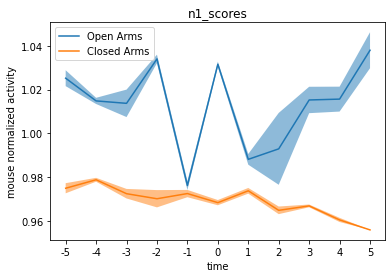

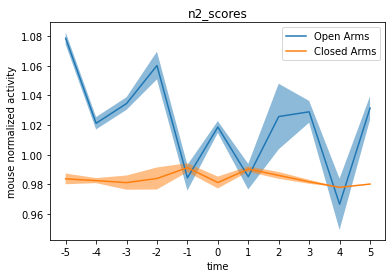

In [11]:
for score_type in ["n1_scores","n2_scores"]:
    oa_scores = []
    ca_scores = []
    t6_oa = []
    t6_ca = []
    for mouse in np.unique(stats_df.mouse):
        mouse_oa_mask = np.logical_and(stats_df.mouse==mouse,
                                       stats_df.openArms==1)
        mouse_ca_mask = np.logical_and(stats_df.mouse==mouse,
                                   stats_df.openArms==0)
        
        if np.sum(mouse_oa_mask) > 0 and np.sum(mouse_ca_mask) > 0:
            six_point_oa = stats_df[mouse_oa_mask==1][score_type].values[5]
            six_point_ca = stats_df[mouse_ca_mask==1][score_type].values[5]
            six_point_mean = np.mean([six_point_oa,six_point_ca])

            oa_scores.append(stats_df[mouse_oa_mask==1][score_type].values / six_point_mean)#/ stats_df[np.logical_and(mouse_oa_mask,
                                                                                                    #stats_df.time==6)]["bxcx_n1_scores"])
            ca_scores.append(stats_df[mouse_ca_mask==1][score_type].values / six_point_mean)  #/ stats_df[np.logical_and(mouse_ca_mask,

    
    
    oa_scores = np.array(oa_scores)
    oa_mean = np.mean(oa_scores,axis=0)
    oa_std = np.std(oa_scores,axis=0) / np.sqrt(11)

    ca_scores = np.array(ca_scores)
    ca_mean = np.mean(ca_scores,axis=0) 
    ca_std = np.std(ca_scores,axis=0) / np.sqrt(11)
    #print(wilcoxon(oa_scores[:,5],ca_scores[:,6]))
    
    plt.plot(oa_mean,label="Open Arms")
    plt.fill_between(range(11),oa_mean+oa_std,oa_mean-oa_std,alpha=0.5)
    plt.plot(ca_mean,label="Closed Arms")
    plt.fill_between(range(11),ca_mean+ca_std,ca_mean-ca_std,alpha=0.5)
    plt.xticks(range(11),np.arange(11) - 5)
    plt.xlabel('time')
    plt.ylabel('mouse normalized activity')
    plt.title(score_type)
    plt.legend()
    plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: invalid index to scalar variable.

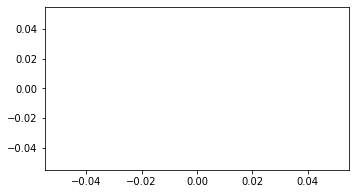

In [12]:

for score_type in ["n1_scores","n2_scores"]:
    clck_oa_scores = []
    clck_ca_scores = []

    wt_oa_scores = []
    wt_ca_scores = []
    for mouse in np.unique(stats_df.mouse):
        
        mouse_oa_mask = np.logical_and(stats_df.mouse==mouse,
                                       stats_df.openArms==1)
        mouse_ca_mask = np.logical_and(stats_df.mouse==mouse,
                                   stats_df.openArms==0)
        
        if np.sum(mouse_oa_mask) > 0 and np.sum(mouse_ca_mask) > 0:
            six_point_oa = stats_df[mouse_oa_mask==1][score_type].values[5]
            six_point_ca = stats_df[mouse_ca_mask==1][score_type].values[5]
            six_point_mean = np.mean([six_point_oa,six_point_ca])
            
            if stats_df[mouse_oa_mask==1]["geno"].values[0]==1:
                
                wt_oa_scores.append(stats_df[mouse_oa_mask==1][score_type].values / six_point_mean)#/ stats_df[np.logical_and(mouse_oa_mask,
                                                                                                        #stats_df.time==6)]["bxcx_n1_scores"])
                wt_ca_scores.append(stats_df[mouse_ca_mask==1][score_type].values / six_point_mean)  #/ stats_df[np.logical_and(mouse_ca_mask,
                
            else:
                clck_oa_scores.append(stats_df[mouse_oa_mask==1][score_type].values / six_point_mean)#/ stats_df[np.logical_and(mouse_oa_mask,
                                                                                                        #stats_df.time==6)]["bxcx_n1_scores"])
                clck_ca_scores.append(stats_df[mouse_ca_mask==1][score_type].values / six_point_mean)  #/ stats_df[np.logical_and(mouse_ca_mask,

    
    
    wt_oa_scores = np.array(wt_oa_scores)
    wt_oa_mean = np.mean(wt_oa_scores,axis=0)
    wt_oa_std = np.std(wt_oa_scores,axis=0) / np.sqrt(len(wt_oa_scores))

    clck_oa_scores = np.array(clck_oa_scores)
    clck_oa_mean = np.mean(clck_oa_scores,axis=0)
    clck_oa_std = np.std(clck_oa_scores,axis=0) / np.sqrt(len(clck_oa_scores))
    
    wt_ca_scores = np.array(wt_ca_scores)
    wt_ca_mean = np.mean(wt_ca_scores,axis=0) 
    wt_ca_std = np.std(wt_ca_scores,axis=0) / np.sqrt(len(wt_ca_scores))
    
    clck_ca_scores = np.array(clck_ca_scores)
    clck_ca_mean = np.mean(clck_ca_scores,axis=0) 
    clck_ca_std = np.std(clck_ca_scores,axis=0) / np.sqrt(len(clck_ca_scores))
    #print(wilcoxon(oa_scores[:,5],ca_scores[:,6]))
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    plt.plot(wt_oa_mean,label="Balb/c Open Arms n=6")
    plt.fill_between(range(11),wt_oa_mean+wt_oa_std,wt_oa_mean-wt_oa_std,alpha=0.5)
    
    plt.plot(clck_oa_mean,label="CLCK Open Arms n=9")
    plt.fill_between(range(11),clck_oa_mean+clck_oa_std,clck_oa_mean-clck_oa_std,alpha=0.5)
    
    plt.xticks(range(11),np.arange(11) - 5)
    plt.xlabel('time')
    plt.ylabel('mouse normalized activity')
    plt.title(score_type)
    plt.legend()
    plt.ylim([0.9,1.20])
    #plt.xlim([3,8])

    plt.subplot(1,2,2)
    plt.plot(wt_ca_mean,label="Balb/c Closed Arms n=6")
    plt.fill_between(range(11),wt_ca_mean+wt_ca_std,wt_ca_mean-wt_ca_std,alpha=0.5)
    
    plt.plot(clck_ca_mean,label="CLCK Closed Arms n=9")
    plt.fill_between(range(11),clck_ca_mean+clck_ca_std,clck_ca_mean-clck_ca_std,alpha=0.5)
    
    plt.xticks(range(11),np.arange(11) - 5)
    plt.xlabel('time')
    plt.ylabel('mouse normalized activity')
    plt.title(score_type)
    plt.legend()
    plt.ylim([0.9,1.20])
    #plt.xlim([3,8])
    plt.show()

In [ ]:
max_size = 300
n_mice = 2
network_score_matrices = []
for net_type in ["net 1 scores","net 2 scores", "net 3 scores"]:
    score_matrix = np.zeros((np.unique(df_in_task.mouse).shape[0],max_size)) * np.nan
    mouse_hc_mean_scores = []
    mouse_geno_list = []
    
    for idx,mouse in enumerate(np.unique(df_in_task.mouse)):
        geno = df_in_task[df_in_task.mouse==mouse].condition.values[0]
        mouse_geno_list.append(geno)
        mouse_mask = df_in_task.mouse==mouse
        mouse_start_time = np.min(df_in_task[mouse_mask==1].time)
        mouse_max_time = mouse_start_time + max_size
        time_mask = np.logical_and(df_in_task.time >= mouse_start_time, df_in_task.time < mouse_max_time)
        mask= np.logical_and(mouse_mask,time_mask)
        
        closed_arms = np.logical_or(df_in_task[mask==1]["roi"].values==1,
                                    df_in_task[mask==1]["roi"].values==3)
        drop_mask = 1 - closed_arms
        
        nan_mask = np.ones(closed_arms.shape)
        nan_mask[drop_mask==1]=np.nan

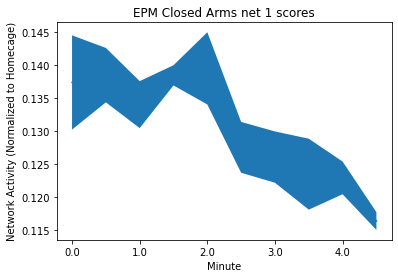

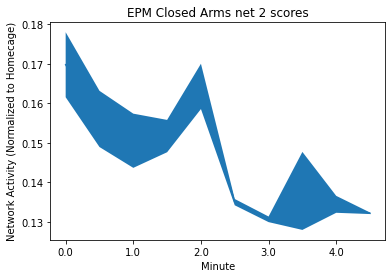

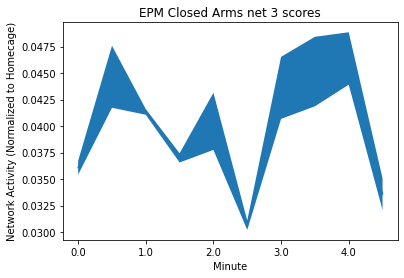

In [38]:
max_size = 300
n_mice = 2
network_score_matrices = []
for net_type in ["net 1 scores","net 2 scores", "net 3 scores"]:
    score_matrix = np.zeros((np.unique(df_in_task.mouse).shape[0],max_size)) * np.nan
    mouse_hc_mean_scores = []
    mouse_geno_list = []
    
    for idx,mouse in enumerate(np.unique(df_in_task.mouse)):
        geno = df_in_task[df_in_task.mouse==mouse].condition.values[0]
        mouse_geno_list.append(geno)
        mouse_mask = df_in_task.mouse==mouse
        mouse_start_time = np.min(df_in_task[mouse_mask==1].time)
        mouse_max_time = mouse_start_time + max_size
        time_mask = np.logical_and(df_in_task.time >= mouse_start_time, df_in_task.time < mouse_max_time)
        mask= np.logical_and(mouse_mask,time_mask)
        
        
        closed_arms = np.logical_or(df_in_task[mask==1]["roi"].values==1,
                                    df_in_task[mask==1]["roi"].values==3)
        drop_mask = 1 - closed_arms
        
        nan_mask = np.ones(closed_arms.shape)
        nan_mask[drop_mask==1]=np.nan
        
        
        scores = df_in_task[mask==1][net_type]*nan_mask #/ np.nanmean(df_in_hc[df_in_hc.mouse==mouse][net_type])
        times = df_in_task[mask==1].time - df_in_task[mask==1].time.values[0]
        mouse_hc_mean_scores.append(np.nanmean(df_in_hc[df_in_hc.mouse==mouse][net_type].values))
        keep_scores = []
        for time in range(max_size):
            if time in list(times):
                score_idx = np.where(times==time)[0][0]
                keep_scores.append(scores.values[score_idx])
            else:
                keep_scores.append(np.nan)
                
        keep_scores = np.array(keep_scores)
        
        #keep_scores = [scores[np.where(times==time)[0][0]] if time in times else np.nan for time in range(300)]
        
        score_matrix[idx,:] = keep_scores
        
    saveMat = np.hstack([np.unique(df_in_task.mouse).reshape(-1,1),
                         np.array(mouse_geno_list).reshape(-1,1),
                         np.array(mouse_hc_mean_scores).reshape(-1,1),
                         score_matrix]).astype(object)
    df_temp = pd.DataFrame(saveMat,
                           columns = ["mouse","geno","HC_mean_scores"] + list(np.arange(1,301).astype(str)))
    network_score_matrices.append(df_temp)
    df_temp.to_csv(PROJECT_PATH + "Apr_2024" + "_".join(net_type.split(" ")) + "_CD19EPM_closed_arm_scores_over_time_w_HC_mean.csv")
    second_averages = 30
    mean = np.nanmean(np.nanmean(score_matrix.reshape(n_mice,-1,second_averages),axis=2),axis=0)
    sterr = np.nanstd(np.nanmean(score_matrix.reshape(n_mice,-1,second_averages),axis=2),axis=0) / np.sqrt(9)
    plt.plot(mean)
    plt.fill_between(range(int(max_size/second_averages)),mean + sterr, mean - sterr)
    
    #plt.xticks(np.arange(int(max_size/second_averages)), np.arange(0,max_size,int(max_size/second_averages)))
    plt.title("EPM Closed Arms "+net_type)
    plt.ylabel("Network Activity")
    plt.xlabel("Network Activity")
    plt.xticks(np.arange(0,10,2),np.arange(0,10,2)*30/60)
    plt.xlabel("Minute")
    plt.ylabel("Network Activity (Normalized to Homecage)")
    #plt.ylim([1.2,2.2])
    plt.show()

In [22]:
np.sum(np.isnan(score_matrix[0,:]))

193

In [23]:
np.sum(np.isnan(score_matrix[1,:]))

145

In [29]:
df_in_task[mask==1]["roi"]

1222    3.0
1223    3.0
1224    3.0
1225    3.0
1226    3.0
       ... 
1512    5.0
1513    5.0
1514    5.0
1515    5.0
1516    5.0
Name: roi, Length: 295, dtype: float64

In [34]:
1 - np.isnan(score_matrix[1,:])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
closed_arms.astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
score_matrix.shape

(2, 300)